In [1]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
extent = [1, len(s[1]), twt[-1], twt[0]]  # define extent
ax.imshow(data_cmp[1:,s[1]], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('Common midpoint Gather');
ax.set_ylabel('TWT [ms]');

NameError: name 'np' is not defined

In [2]:
# Set the default image size
from holoviews import opts

opts.defaults(opts.Image(width=800, height=600))
p = xr.DataArray(f.trace.raw[119::120][:,0:500].T) # common offset gather
p.hvplot.image(clim=(vmin, vmax), cmap='gray', flip_yaxis=True) 


AttributeError: type object 'opts' has no attribute 'Image'

In [3]:
import numpy as np
import segyio
import matplotlib.pyplot as plt
import statistics as st
import xarray as xr
import hvplot.xarray
import panel as pn
import pandas as pd
import re

In [4]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

In [5]:
sys_segy= "C:/Users/mohamed elgashti/Downloads/seismic.segy"
f = segyio.open(sys_segy, ignore_geometry = True)
#print(segyio.tools.wrap(f.text[0]))
with segyio.open(sys_segy, ignore_geometry = True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:].T  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 120120, N Samples: 1500, Sample rate: 4.0ms'

In [6]:
f = segyio.open(sys_segy, ignore_geometry = True)

src_x = f.attributes(segyio.TraceField.SourceX)
grp_x = f.attributes(segyio.TraceField.GroupX)


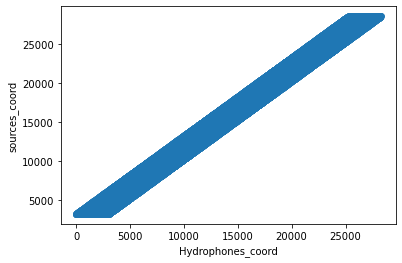

In [7]:
# plotting 'aquisition geometry'

fig, ax = plt.subplots()
ax.scatter(grp_x, src_x)
ax.set_xlabel('Hydrophones_coord')
ax.set_ylabel('sources_coord')
plt.show()

# from the plot we can see the distribution of the sources and recievers 'aquisition geometry'.

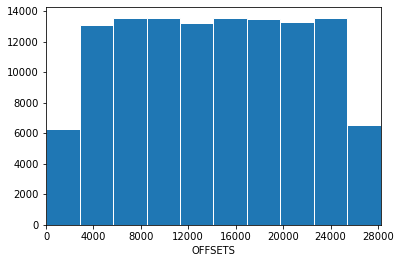

In [8]:
# we can see from the histogram that the middle values of offsets are the most common.

fig, ax = plt.subplots()

ax.hist(grp_x, linewidth=1,edgecolor="white")
ax.set(xlim=(0, 28250), xticks=np.arange(0,28250,4000))
ax.set_xlabel('OFFSETS')

plt.show()


# we can find the most common offsets by using multimode.

#modes=st.multimode(grp_x)

In [9]:
# finding the common mid-point and signed offset coordinates.

# the common mid-point = (g+s)/2


midp_cord=[]
for i in range(0,120120):
    
    a=(src_x[i]+grp_x[i])/2
    midp_cord.append(a)

# the offset = (g-s)/2

offset=[]
for i in range(0,120120):
    
    q=(grp_x[i]-src_x[i])/2
    offset.append(q)



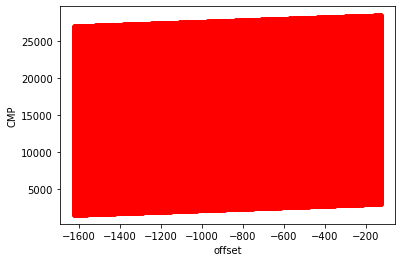

In [10]:
#plotting in mid-point-offset coord!

fig, ax = plt.subplots()

ax.scatter(offset, midp_cord, color='red')
ax.set_xlabel('offset')
ax.set_ylabel('CMP')

plt.show()

In [11]:
# MOST Important headers that i found!

OFFSET=f.attributes(segyio.TraceField.offset)
CDP=f.attributes(segyio.TraceField.CDP)
CDP_TRACE=f.attributes(segyio.TraceField.CDP_TRACE)
TRACE_SAMPLE_COUNT=f.attributes(segyio.TraceField.TRACE_SAMPLE_COUNT)
TRACE_SAMPLE_INTERVAL=f.attributes(segyio.TraceField.TRACE_SAMPLE_INTERVAL)


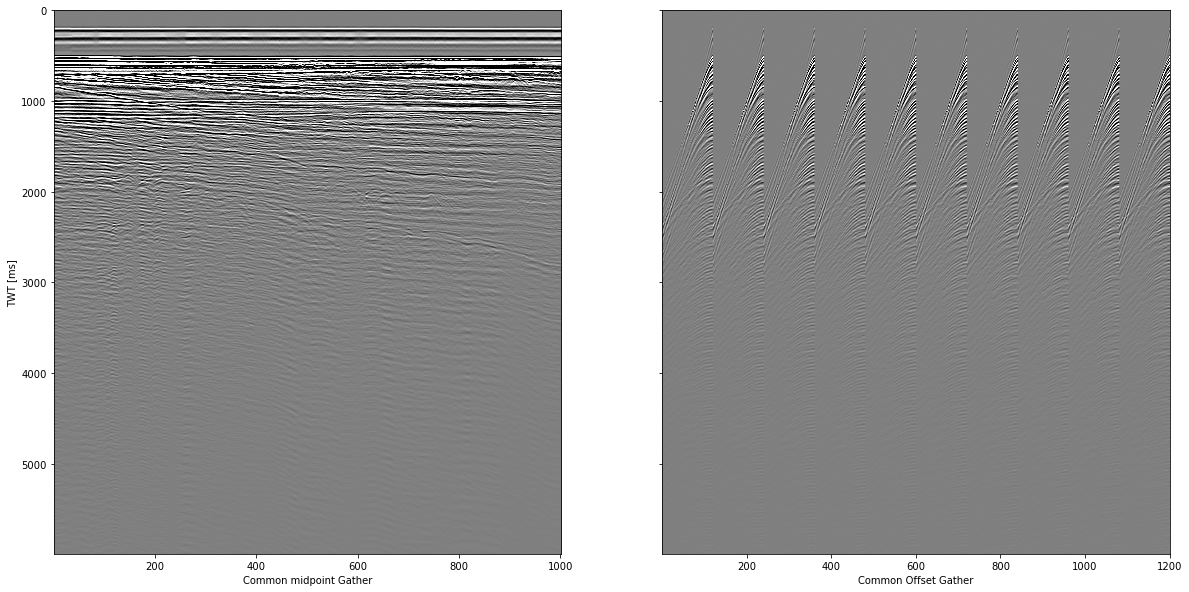

In [12]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(20,10))

extent = [1, 1001, twt[-1], twt[0]]  # define extent
ax.imshow(data[:,119::120], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('Common midpoint Gather');
ax.set_ylabel('TWT [ms]');

extent1 = [1, 1200, twt[-1], twt[0]]  # define extent
ax1.imshow(data[:,:1200], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent1)

ax1.set_xlabel('Common Offset Gather');


In [13]:
# clip_percentile = 99
# vm = np.percentile(data, clip_percentile)
# f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

# fig = plt.figure(figsize=(15, 10))
# ax = fig.add_subplot()
# extent = [1, 1200, twt[-1], twt[0]]  # define extent
# ax.imshow(data[:,:1200], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
# ax.set_xlabel('trace number');
# ax.set_ylabel('TWT [ms]');

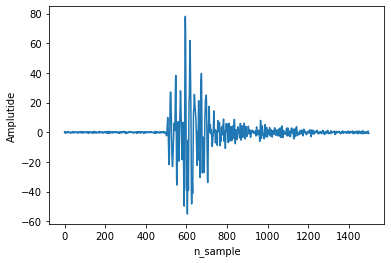

In [14]:
f = segyio.open(sys_segy, ignore_geometry = True)

plt.plot(data[:,0])
plt.xlabel('n_sample')
plt.ylabel('Amplutide')
# parameters

water_v = 1487 # m/s
sample_int = 4/1000 # converted from milli_sec to sec 
TWT = 128*sample_int # num_sample picked for waterbed interface
h_min = 131 # mid-point min_offset
water_depth = ((TWT*water_v)**2 - h_min**2)**0.5


 #twt_wb=np.zeros(120120)

#for i in range (0,120120):
  
    #twt_wb[i] = (( offset[i]**2 + water_depth**2)**0.5) / water_v * 1000
    


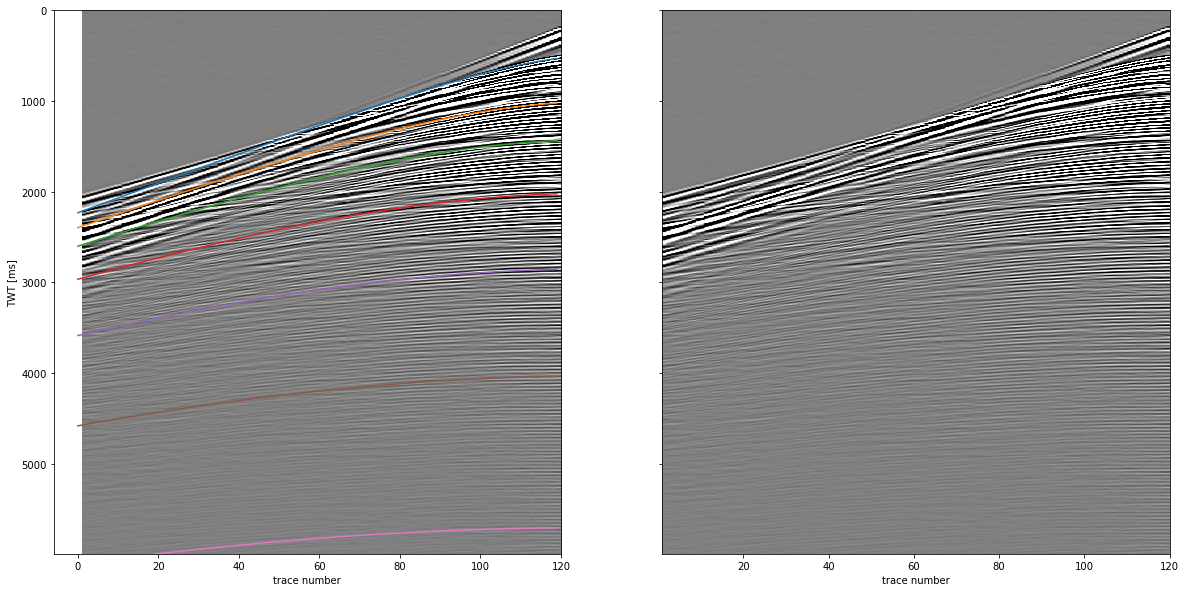

In [23]:
# calculate waterbed reflector and multiples
twt_wb=np.zeros(120120)
twt_multi_1 = np.zeros(120120)
twt_multi_2 = np.zeros(120120)
twt_multi_3 = np.zeros(120120)
twt_multi_4 = np.zeros(120120)
twt_multi_5 = np.zeros(120120)
twt_multi_6 = np.zeros(120120)


for i in range (0,120120):
    twt_wb[i] = (( OFFSET[i]**2 + water_depth**2)**0.5) / water_v * 1000
    twt_multi_1[i] = ( 4*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
    twt_multi_2[i] = ( 8*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
    twt_multi_3[i] = ( 16*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
    twt_multi_4[i] = ( 32*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
    twt_multi_5[i] = ( 64*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
    twt_multi_6[i] = ( 128*(water_depth)**2 + OFFSET[i]**2 )**0.5 / water_v * 1000
   
t0 = ( TWT**2 - (h_min**2 / water_v**2) )**0.5


# plot waterbed reflector and multiples in Common Shot Gather 

clip_percentile = 95
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(20,10))
extent = [1, 120, twt[-1], twt[0]]  # define extent
ax.imshow(data[:,:120], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)

ax.plot(np.arange(0,120),twt_wb[:120])
ax.plot(np.arange(0,120),twt_multi_1[:120])
ax.plot(np.arange(0,120),twt_multi_2[:120])
ax.plot(np.arange(0,120),twt_multi_3[:120])
ax.plot(np.arange(0,120),twt_multi_4[:120])
ax.plot(np.arange(0,120),twt_multi_5[:120])
ax.plot(np.arange(0,120),twt_multi_6[:120])

ax.set_xlabel('trace number');
ax.set_ylabel('TWT [ms]');

extent1 = [1, 120, twt[-1], twt[0]]  # define extent
ax1.imshow(data[:,:120], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent1)


ax1.set_xlabel('trace number');




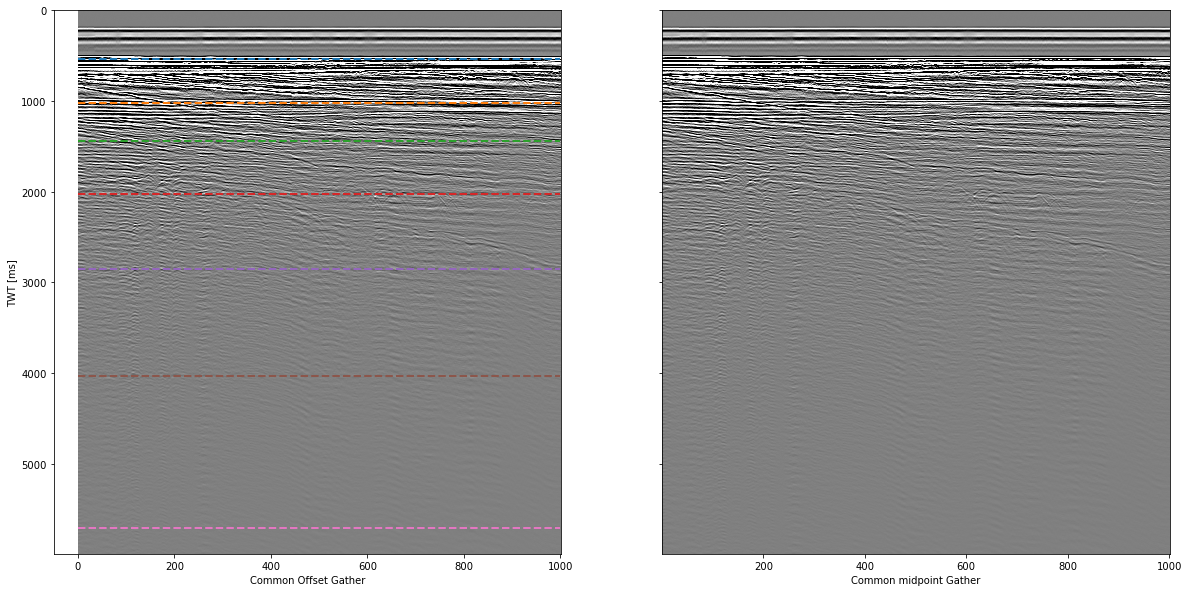

In [24]:
# plot waterbed reflector and multiples in Common offset Gather 


clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(20,10))

extent = [1, 1001, twt[-1], twt[0]]  # define extent
ax.imshow(data[:,119::120], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)


ax.plot(np.arange(0,1001),twt_wb[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_1[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_2[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_3[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_4[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_5[119::120],linestyle='dashed', linewidth=2)
ax.plot(np.arange(0,1001),twt_multi_6[119::120],linestyle='dashed', linewidth=2)

ax.set_xlabel('Common Offset Gather');
ax.set_ylabel('TWT [ms]');

extent1 = [1, 1001, twt[-1], twt[0]]  # define extent
ax1.imshow(data[:,119::120], cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent1)
ax1.set_xlabel('Common midpoint Gather');


In [25]:
#CMP = np.concatenate((midp_cord,data.T), axis=1)
#data_cmp = CMP[CMP[:,0].argsort()].T


In [26]:
#np.unique(midp_cord)[100:150]
#s = np.where(data_cmp == 3481)

